# 1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [57]:
import pandas as pd

# Ruta del archivo CSV: 
ruta_csv = "../../_data/data_dengue_peru.csv" #Ponemos el ../.. para retroceder 

# Cargar el archivo CSV en un DataFrame
dengue_df = pd.read_csv(ruta_csv)
dengue_df

/var/folders/s9/hw3ppzss5358337p02w215p80000gn/T/ipykernel_3783/665424459.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue_df = pd.read_csv(ruta_csv)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [58]:
dengue_df.columns[7]

'Casos'

# 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [59]:
#Ubigeo is made out of 6 characters. The first two are a code for the Department. The codes for Department range from 01 to 25, but here we see that the dataframe 
#is ommiting the 0 at the beginning, so we fix thagt
dengue_df['Ubigeo'] = dengue_df['Ubigeo'].astype(str).str.zfill(6)

In [60]:
dengue_df #We check if everything is alright

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [61]:
#Now we can generate an Ubigeo for Department (made out by the first 2 digits) and Provincias (made out by the 4 next digits)
# Extraer los códigos 'Ubigeo' departamentales y provinciales
dengue_df['Ubigeo_Departamental'] = dengue_df['Ubigeo'].str[:2]
dengue_df['Ubigeo_Provincial'] = dengue_df['Ubigeo'].str[2:6]

In [62]:
dengue_df

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departamental,Ubigeo_Provincial
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0914
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,0101
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0914
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0914
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,0203
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,0303


# 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [63]:
conda install geopandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [65]:
# Filter the data for the year 2021
dengue_2021 = dengue_df[dengue_df['Año'] == 2021]

# Convert the 'Casos' column to numeric
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')

/var/folders/s9/hw3ppzss5358337p02w215p80000gn/T/ipykernel_3783/3378873411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')


In [66]:
import numpy as np

def custom_sum(series):
    # Check if all values are NaN
    if series.isna().all():
        return np.nan
    # Check if all values are zero or if there is a mix of NaN and zero
    elif (series == 0).all() or (series.fillna(0) == 0).all():
        # If there is at least one NaN in the original series, return NaN
        if series.isna().any():
            return np.nan
        else:
            return 0
    # If there is at least one positive value, replace NaN with 0 and sum all the values
    else:
        return series.fillna(0).sum()

# Apply the custom function to sum the cases by district. It sums the number of weekly cases in each district to obtain the cumulative count for the year 2021 in each district
total_cases_by_district = dengue_2021.groupby('Ubigeo')['Casos'].apply(custom_sum).reset_index()

In [67]:
# Load the shapefile into a GeoDataFrame
shapefile_path = '../../_data/LIMITE_DISTRITAL_2020_INEI/'

# Load the shapefile using the relative path.
distritos_gdf = gpd.read_file(shapefile_path)

# Print the column names of the GeoDataFrame
print(distritos_gdf.columns)

Index(['CCDD', 'NOMBDEP', 'CCPP', 'NOMBPROV', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'UBIGEO', 'IDPROV', 'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'DESCARGAR',
       'WHATSAPP', 'CONTACTO', 'geometry'],
      dtype='object')


In [68]:
# Perform the merge based on Ubigeo
merged_gdf = distritos_gdf.merge(total_cases_by_district, left_on='UBIGEO', right_on='Ubigeo')

print(merged_gdf.columns)

Index(['CCDD', 'NOMBDEP', 'CCPP', 'NOMBPROV', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'UBIGEO', 'IDPROV', 'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'DESCARGAR',
       'WHATSAPP', 'CONTACTO', 'geometry', 'Ubigeo', 'Casos'],
      dtype='object')


In [69]:
print(merged_gdf)

    CCDD     NOMBDEP CCPP          NOMBPROV CCDI       NOMBDIST  \
0     14  LAMBAYEQUE   01          CHICLAYO   06    LA VICTORIA   
1     14  LAMBAYEQUE   01          CHICLAYO   07        LAGUNAS   
2     14  LAMBAYEQUE   01          CHICLAYO   08        MONSEFU   
3     14  LAMBAYEQUE   01          CHICLAYO   15          SAÑA   
4     14  LAMBAYEQUE   01          CHICLAYO   16        CAYALTI   
..   ...         ...  ...               ...  ...            ...   
464   25     UCAYALI   01  CORONEL PORTILLO   06  NUEVA REQUENA   
465   01    AMAZONAS   07         UTCUBAMBA   07          YAMON   
466   01    AMAZONAS   07         UTCUBAMBA   05        JAMALCA   
467   01    AMAZONAS   02             BAGUA   03       COPALLIN   
468   12       JUNIN   06            SATIPO   04       MAZAMARI   

           CAPITAL  UBIGEO IDPROV  CODIGO  CNT_CCPP     DESCRIPCIO  \
0      LA VICTORIA  140106   1401  140106        28    LA VICTORIA   
1           MOCUPE  140107   1401  140107        27    

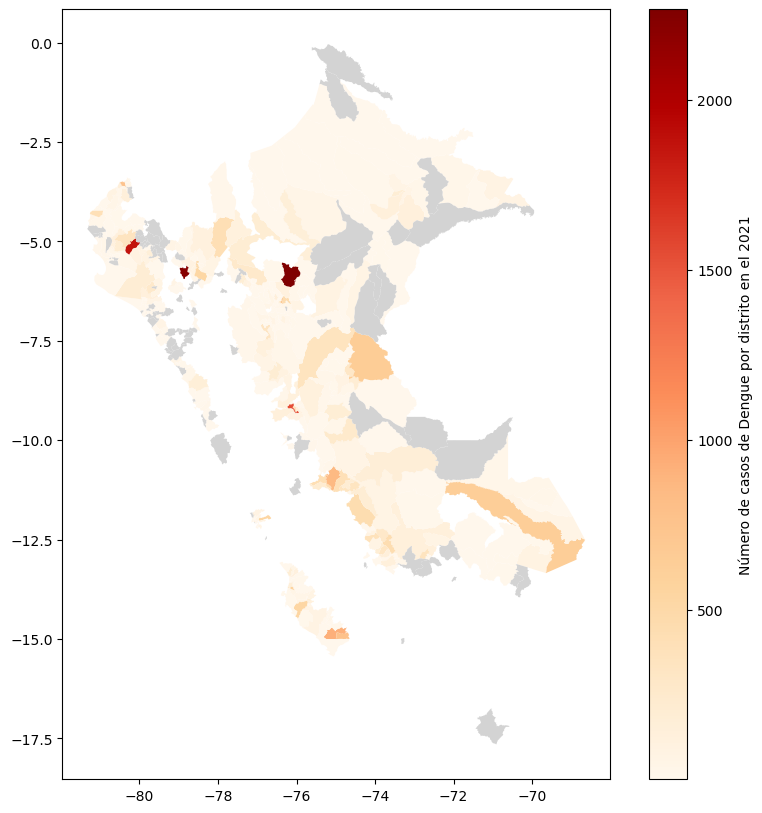

In [70]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Use the 'Cases' column that exists in merged_gdf.
plot = merged_gdf.plot(column='Casos', 
                       ax=ax, 
                       legend=False,  # Do not create a legend automatically
                       cmap='OrRd',  # Colors for data ranges
                       missing_kwds={'color': 'lightgrey'})  # Color for missing data

# Now the colorbar can be created using the color collection from 'plot', 
#which is the first element in the 'ax' collections list
cbar = fig.colorbar(plot.collections[0], ax=ax)
cbar.set_label('Número de casos de Dengue por distrito en el 2021')
plt.show()